<a href="https://colab.research.google.com/github/rahulraopune/ACA-Benchmarking-Script/blob/master/LinearRegressionGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [143]:
dataset = pd.read_csv("https://raw.githubusercontent.com/rahulraopune/Machine-Learning-Basics/master/ex1data.txt",header=None)
dataset.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# New Section

In [144]:
dataset.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [0]:
def normalize_features(X):
    mean = np.mean(X, axis = 0)
    std_dev = np.std(X, axis = 0)
    X_Norm = (X - mean) / std_dev
    return X_Norm

In [0]:
def compute_error(X,Y,w):
    h_x = X.dot(w)
    squareError = (Y - h_x) ** 2
    return (1/(2*len(Y))) * np.sum(squareError)

In [147]:
data=dataset.values
m = data[:,0].size
ones = np.ones(m).reshape(-1,1)
X = np.append(ones,data[:,0].reshape(-1,1),axis = 1)
Y = data[:,1].reshape(-1,1)
w = np.zeros((2,1))
print(compute_error(X,Y,w))

32.072733877455676


In [0]:
def gradient_descent(X,Y,w,learning_rate,iterations):

    m=len(Y)
    error_cost_iteration = []

    for iter in range(iterations):
        h_x = np.dot(X,w)
        error = np.matmul(X.transpose(),(h_x - Y)) 
        gradient_descent = learning_rate / m * error
        w = w - gradient_descent
        error_cost_iteration.append(compute_error(X,Y,w))

    return w,error_cost_iteration

In [155]:
w,error_cost_iteration = gradient_descent(X,Y,w,0.01,1500)
print(w)

[[-3.87805118]
 [ 1.1912525 ]]


Text(0, 0.5, 'w')

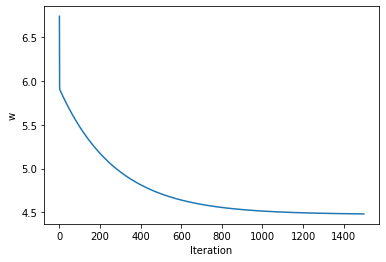

In [150]:
plt.plot(error_cost_iteration)
plt.xlabel("Iteration")
plt.ylabel("w")

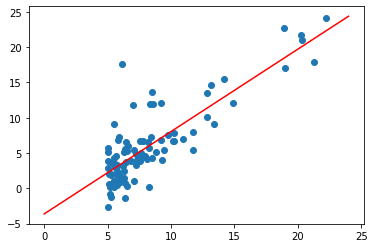

In [151]:
data=dataset.values
X_train = data[:,0]
Y_train = data[:,1]
plt.scatter(X_train,Y_train)
x_value=[x for x in range(25)]
y_value=[y*w[1]+w[0] for y in x_value]
plt.plot(x_value,y_value,color="r")

Text(0.5, 0, '$E(h(x))$')

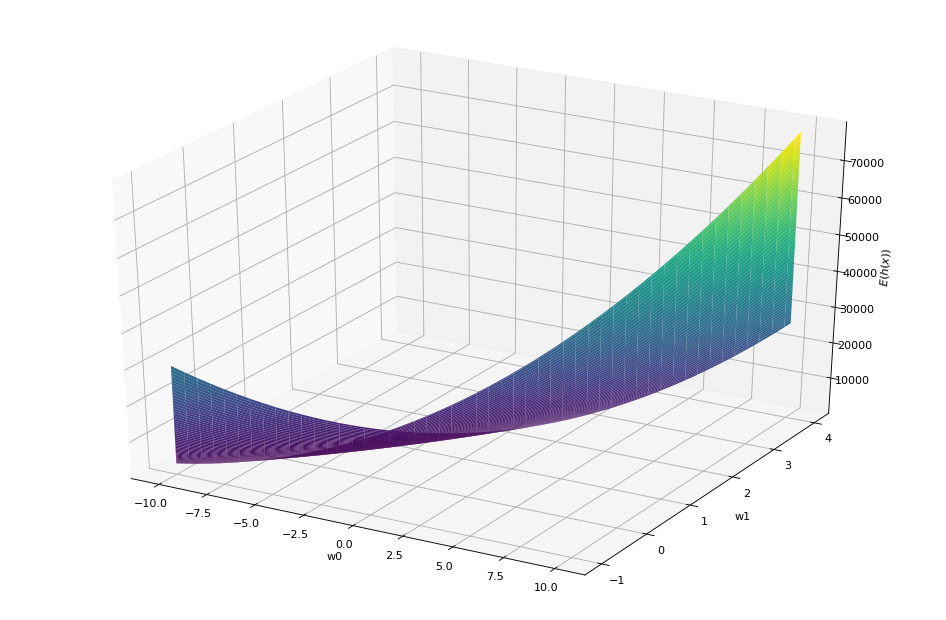

In [152]:
w0=np.linspace(-10,10,100)
w1=np.linspace(-1,4,100)
E_h_x=np.zeros((len(w0),len(w1)))

for i in range(len(w0)):
    for j in range(len(w1)):
        t=np.array([w0[i],w1[j]])
        E_h_x[i,j]=compute_error(X,Y,t)

fig=plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(w0,w1,E_h_x,cmap="viridis")
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("$E(h(x))$")

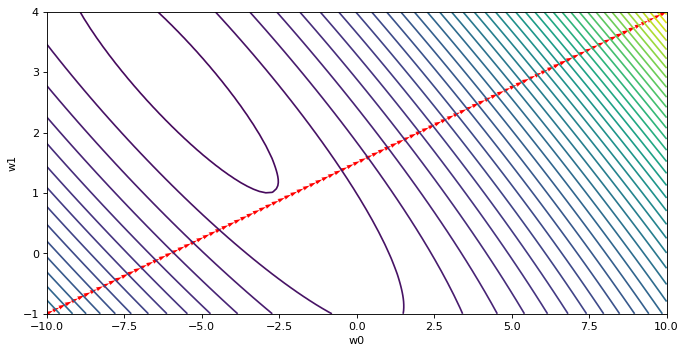

In [153]:
anglesx = np.array(w0)[1:] - np.array(w0)[:-1]
anglesy = np.array(w1)[1:] - np.array(w1)[:-1]
fig=plt.figure(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.contour(w0, w1, E_h_x, 50, cmap = 'viridis')
ax.quiver(w0[:-1], w1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = 1)